## Predicting student dropout with student attributes

In [623]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/lirunhe/Desktop/data.csv', sep=';')

In [624]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [625]:
features = df.columns.drop('Target')

In [626]:
#for col in features:
    #print(f"\n--- {col} ---")
    #print(df[col].value_counts())

In [627]:
#Get basic info of dataset
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [628]:
df.shape

(4424, 37)

## Split data for feature selection

In [630]:
features = df.columns.drop('Target')

In [631]:
#Use random forest to select 10 most useful features
from sklearn import ensemble, model_selection
import sklearn.feature_selection as feature_selection
selector = feature_selection.SelectFromModel(ensemble.RandomForestClassifier(min_samples_leaf = 100), threshold = -np.inf, max_features = 10)
##selector = feature_selection.SelectFromModel(ensemble.RandomForestClassifier(min_samples_leaf = 50), threshold = 'mean')
selector.fit(df[features], df['Target'])
support = selector.get_support()
support

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False, False, False, False])

In [632]:
true_indices = np.where(support)
df[features].columns[true_indices]

Index(['Tuition fees up to date', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)'],
      dtype='object')

## Data Cleaning

In [634]:
# Most columns regarding Curricular units overlap - needs to be removed
# Remove every "Curricular Unit"column except (enrolled)

In [635]:
dropped_features = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Tuition fees up to date']
df = df.drop(columns = dropped_features)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,1,0,20,0,0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,1,0,19,0,6,6,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,1,0,19,0,6,6,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,20,0,6,6,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,45,0,6,6,13.9,-0.3,0.79,Graduate


In [637]:
#New dataset has 10 less features
df.shape

(4424, 26)

In [638]:
#Find features after cleaning data
features = df.columns.drop('Target')
features

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor', 'Gender',
       'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 2nd sem (enrolled)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

In [639]:
#Find important features again
selector = feature_selection.SelectFromModel(ensemble.RandomForestClassifier(min_samples_leaf = 100), threshold = -np.inf, max_features = 10)
selector.fit(df[features], df['Target'])
support = selector.get_support()
support

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True, False, False, False])

In [640]:
true_indices = np.where(support)
selected_features = df[features].columns[true_indices]
selected_features

Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Admission grade', 'Debtor', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (enrolled)',
       'Curricular units 2nd sem (enrolled)'],
      dtype='object')

## Graph feature importance

In [642]:
selected_importances = selector.estimator_.feature_importances_[support]
selected_importances

array([0.08997387, 0.03398998, 0.04077668, 0.03561471, 0.08374946,
       0.07684378, 0.1826363 , 0.19638438, 0.07775595, 0.10819755])

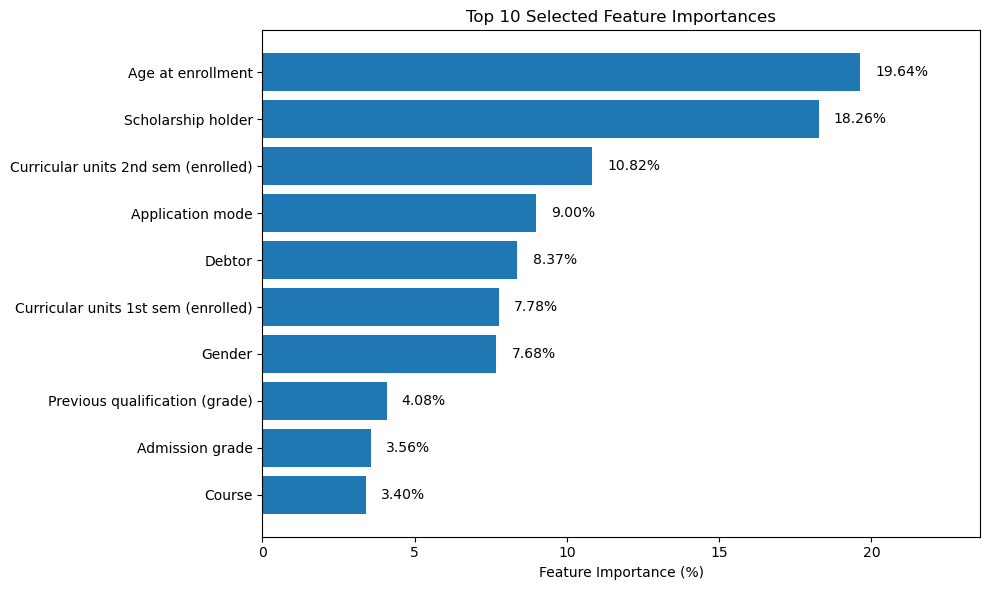

In [643]:
import matplotlib.pyplot as plt

# Sort features by importance
sorted_idx = selected_importances.argsort()
selected_features = selected_features[sorted_idx]
selected_importances = selected_importances[sorted_idx]

# Convert to percentages
selected_importances_percent = selected_importances * 100

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(selected_features, selected_importances_percent)

# Add percentages next to bars
for bar, percentage in zip(bars, selected_importances_percent):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{percentage:.2f}%', va='center')

plt.xlabel('Feature Importance (%)')
plt.title('Top 10 Selected Feature Importances')
plt.xlim(0, max(selected_importances_percent) * 1.2)  # gives a little space for the text
plt.tight_layout()
plt.show()

## Scale Data

In [645]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

## Logistic Regression

In [647]:
#Find best parameter
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'class_weight': ['balanced', None],
    'max_iter': [2000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, df['Target'])

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.6188938313265333


In [648]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(C= 0.1, penalty='l1', solver = 'saga', class_weight=None, max_iter=2000)
model.fit(X_scaled, df['Target'])
model

LogisticRegression(C=0.1, max_iter=2000, penalty='l1', solver='saga')

In [649]:
Log_regression_prediction = model.predict(X_scaled)
Log_regression_accuracy = accuracy_score(df['Target'], Log_regression_prediction)
Log_regression_accuracy

0.6229656419529838

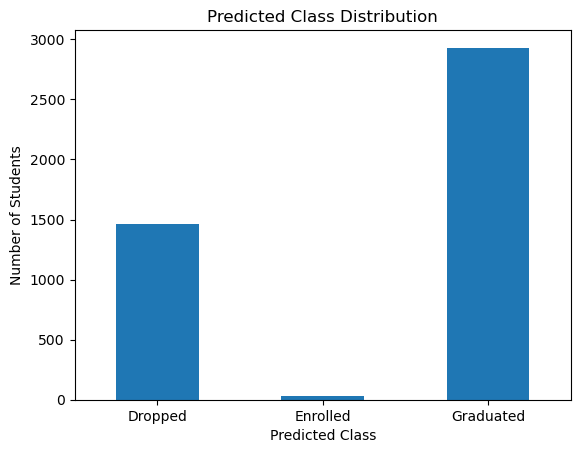

In [650]:
# Turn predictions into a DataFrame
predicted_classes = pd.Series(Log_regression_prediction)

# Plot
predicted_classes.value_counts().sort_index().plot(kind='bar')
plt.xticks(ticks=[0,1,2], labels=["Dropped", "Enrolled", "Graduated"], rotation=0)
plt.xlabel("Predicted Class")
plt.ylabel("Number of Students")
plt.title("Predicted Class Distribution")
plt.show()

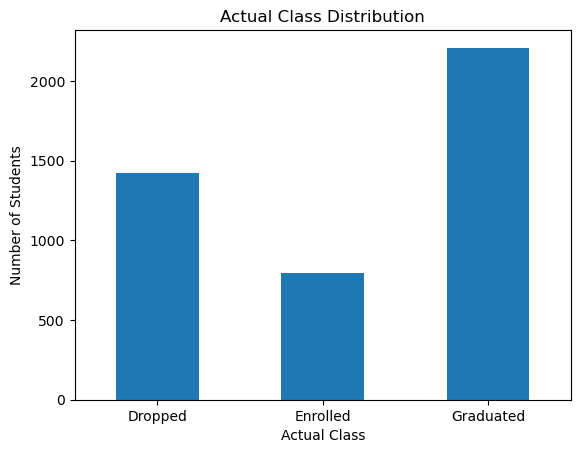

In [651]:
actuall_classes = pd.Series(df['Target'])

# Plot
actuall_classes.value_counts().sort_index().plot(kind='bar')
plt.xticks(ticks=[0,1,2], labels=["Dropped", "Enrolled", "Graduated"], rotation=0)
plt.xlabel("Actual Class")
plt.ylabel("Number of Students")
plt.title("Actual Class Distribution")
plt.show()

In [652]:
# Drop instances that are "enrolled"
df_enrolled_index = df[df['Target'] == 'Enrolled'].index
df = df.drop(df_enrolled_index)
df['Target'].unique()

array(['Dropout', 'Graduate'], dtype=object)

In [653]:
#Re-scale X_scaled after dropping "Enrolled" instances
X_scaled = scaler.fit_transform(df[features])

In [654]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['Target'], test_size=0.2, random_state=42)

In [655]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [656]:
#Find best parameter again
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],
    'class_weight': ['balanced', None],
    'max_iter': [2000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

Best parameters: {'C': 1, 'class_weight': None, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy: 0.7500047480562645


In [657]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(C = 1, penalty='l2', solver = 'saga', class_weight=None, max_iter=2000)
model.fit(X_train_scaled, y_train)
Log_regression_prediction = model.predict(X_test_scaled)
Log_regression_accuracy = accuracy_score(y_test, Log_regression_prediction)
Log_regression_accuracy

0.7520661157024794

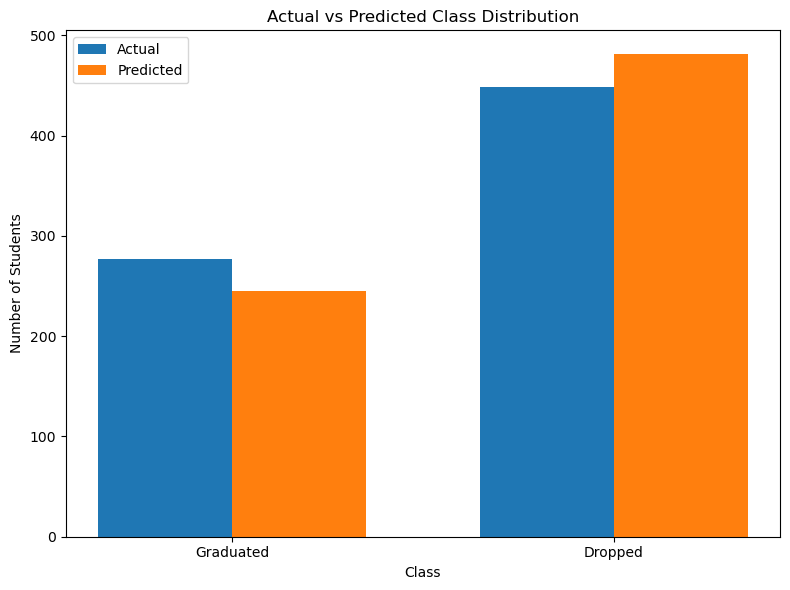

In [658]:
# Convert predictions and true values into series
predicted_series = pd.Series(Log_regression_prediction)
actual_series = pd.Series(y_test)

# Count each class
predicted_counts = predicted_series.value_counts().sort_index()
actual_counts = actual_series.value_counts().sort_index()

# Create a combined DataFrame
combined_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
}).fillna(0)  # in case a class is missing in predictions

# Optional: Map class numbers to names (change if needed)
class_labels = {'Dropped', 'Graduated'}
combined_df.index = class_labels

# Plot side-by-side
bar_width = 0.35
x = np.arange(len(combined_df))

plt.figure(figsize=(8,6))
plt.bar(x - bar_width/2, combined_df['Actual'], width=bar_width, label='Actual')
plt.bar(x + bar_width/2, combined_df['Predicted'], width=bar_width, label='Predicted')

plt.xticks(ticks=x, labels=combined_df.index)
plt.xlabel("Class")
plt.ylabel("Number of Students")
plt.title("Actual vs Predicted Class Distribution")
plt.legend()
plt.tight_layout()
plt.show()

## Random Forest

In [660]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
Random_forest_prediction = model.predict(X_test_scaled)
Random_forest_accuracy = accuracy_score(y_test, Random_forest_prediction)
Random_forest_accuracy

0.7699724517906336

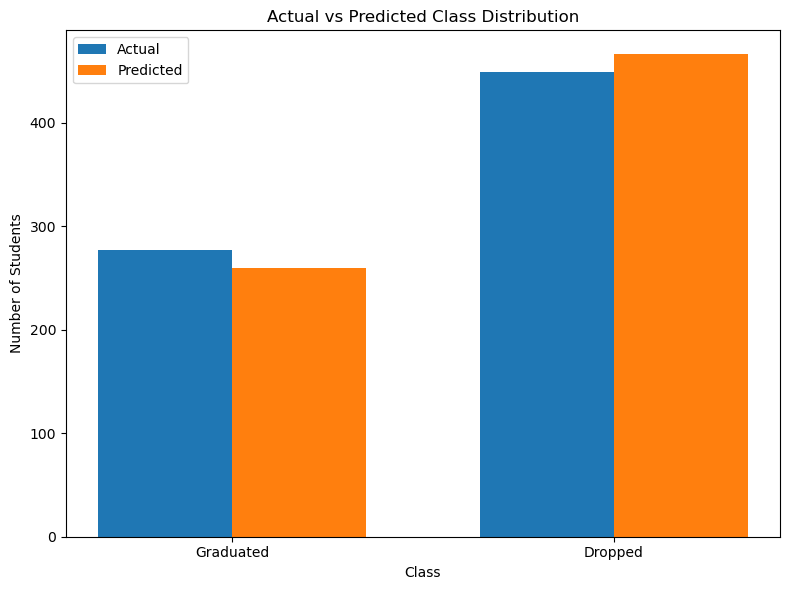

In [661]:
# Convert predictions and true values into series
predicted_series = pd.Series(Random_forest_prediction)
actual_series = pd.Series(y_test)

# Count each class
predicted_counts = predicted_series.value_counts().sort_index()
actual_counts = actual_series.value_counts().sort_index()

# Create a combined DataFrame
combined_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
}).fillna(0)  # in case a class is missing in predictions

# Optional: Map class numbers to names (change if needed)
class_labels = {'Dropped', 'Graduated'}
combined_df.index = class_labels

# Plot side-by-side
bar_width = 0.35
x = np.arange(len(combined_df))

plt.figure(figsize=(8,6))
plt.bar(x - bar_width/2, combined_df['Actual'], width=bar_width, label='Actual')
plt.bar(x + bar_width/2, combined_df['Predicted'], width=bar_width, label='Predicted')

plt.xticks(ticks=x, labels=combined_df.index)
plt.xlabel("Class")
plt.ylabel("Number of Students")
plt.title("Actual vs Predicted Class Distribution")
plt.legend()
plt.tight_layout()
plt.show()

## KNN

In [720]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Create and fit the KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# 2. Predict
knn_prediction = model.predict(X_test_scaled)

# 3. Evaluate accuracy
knn_accuracy = accuracy_score(y_test, knn_prediction)
knn_accuracy

0.7162534435261708

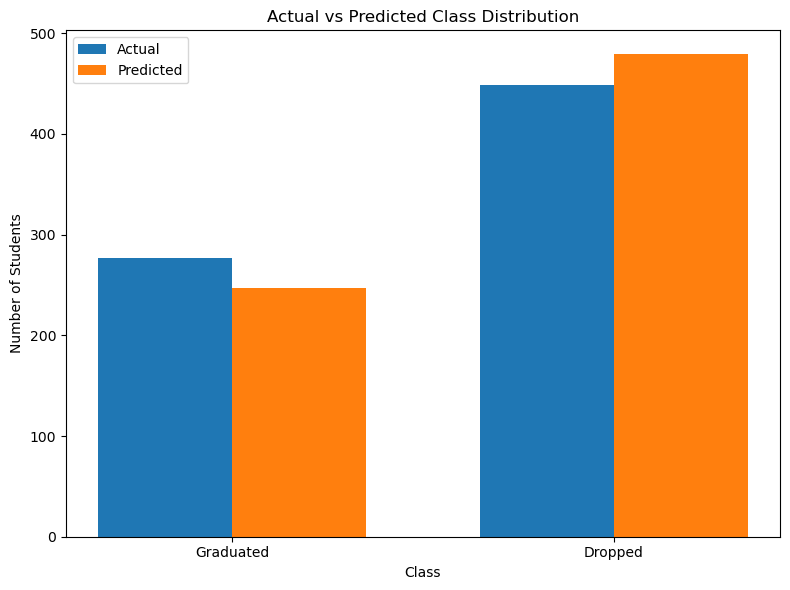

In [722]:
# Convert predictions and true values into series
predicted_series = pd.Series(knn_prediction)
actual_series = pd.Series(y_test)

# Count each class
predicted_counts = predicted_series.value_counts().sort_index()
actual_counts = actual_series.value_counts().sort_index()

# Create a combined DataFrame
combined_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts}).fillna(0)  # in case a class is missing in predictions


# Optional: Map class numbers to names (change if needed)
class_labels = {'Dropped', 'Graduated'}
combined_df.index = class_labels

# Plot side-by-side
bar_width = 0.35
x = np.arange(len(combined_df))

plt.figure(figsize=(8,6))
plt.bar(x - bar_width/2, combined_df['Actual'], width=bar_width, label='Actual')
plt.bar(x + bar_width/2, combined_df['Predicted'], width=bar_width, label='Predicted')

plt.xticks(ticks=x, labels=combined_df.index)
plt.xlabel("Class")
plt.ylabel("Number of Students")
plt.title("Actual vs Predicted Class Distribution")
plt.legend()
plt.tight_layout()
plt.show()

## Bias and patterns in students who dropped out

In [666]:
df_dropped = df[df['Target'] == 'Dropout']
df_graduated = df[df['Target'] != 'Dropout']
df_graduated

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),Unemployment rate,Inflation rate,GDP,Target
1,1,15,1,9254,1,1,160.0,1,1,3,...,1,0,19,0,6,6,13.9,-0.3,0.79,Graduate
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,20,0,6,6,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,45,0,6,6,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,1,0,50,0,5,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,1,18,0,7,8,15.5,2.8,-4.06,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1,1,1,9070,1,1,132.0,1,1,1,...,0,1,20,0,6,6,16.2,0.3,-0.92,Graduate
4418,1,44,1,9070,1,39,120.0,1,3,38,...,1,0,20,0,7,9,16.2,0.3,-0.92,Graduate
4419,1,1,6,9773,1,1,125.0,1,1,1,...,1,0,19,0,6,6,15.5,2.8,-4.06,Graduate
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,1,20,0,5,5,9.4,-0.8,-3.12,Graduate


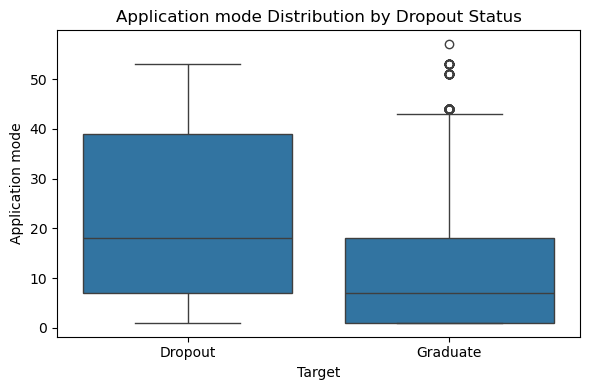

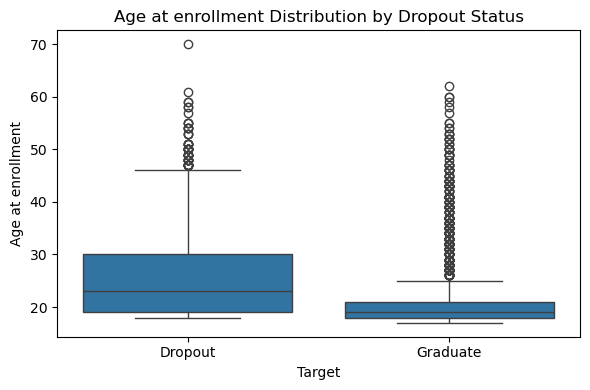

In [708]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['Application mode', 'Age at enrollment']
for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Target', y= col)
    plt.title(f"{col} Distribution by Dropout Status")
    plt.tight_layout()
    plt.show()

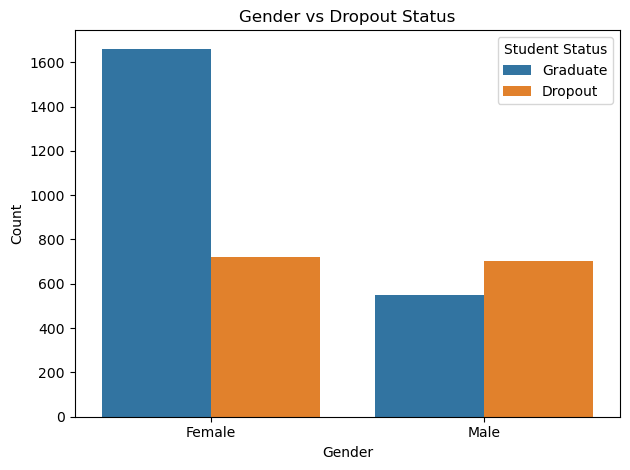

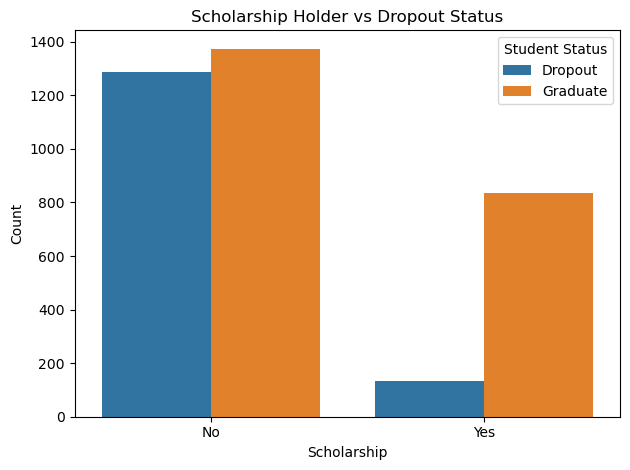

In [724]:
#Visualize Gender vs Dropout Status
sns.countplot(data=df, x='Gender', hue='Target')
plt.title("Gender vs Dropout Status")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])  # ✅ fix labels
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Student Status")
plt.tight_layout()
plt.show()

#Visualize 
sns.countplot(data=df, x='Scholarship holder', hue='Target')
plt.title("Scholarship Holder vs Dropout Status")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])  # ✅ fix labels
plt.xlabel("Scholarship")
plt.ylabel("Count")
plt.legend(title="Student Status")
plt.tight_layout()
plt.show()